In [1]:
import json
import os
from pathlib import Path
from operator import itemgetter

## Default hyperparameters

In [2]:
hyperparams = {
    'batch_size': [26],
    'channels': [40],
    'compared_length': [5,10,15,20,25],
    'depth': [10],
    'nb_steps': [1000,1500,2000,2500,3000],
    'in_channels': [1],
    'kernel_size': [3],
    'penalty': 'null',
    'lr': [0.001, 0.0001, 0.00001],
    'early_stopping': [5],
    'nb_random_samples': [10,15,20,25,30],
    'negative_penalty': [1],
    'out_channels': [320],
    'reduced_size': [160]
}

# 1. Define hyperparameters to tune

In [3]:
hyperparams_tune = {
    'compared_length': [5,10,15,20],
    'nb_steps': [1000,2000,3000,4000],
    'lr': [0.01, 0.001, 0.0001, 0.00001],
    'nb_random_samples': [5,10,15,20],
}

# 2. Get all possible combinations of these hyperparameters

In [4]:
import itertools
keys, values = zip(*hyperparams_tune.items())
experiments = [dict(zip(keys, v)) for v in itertools.product(*values)]
print(len(experiments))
for experiment in experiments:
    print(experiment)

256
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.01, 'nb_random_samples': 5}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.01, 'nb_random_samples': 10}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.01, 'nb_random_samples': 15}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.01, 'nb_random_samples': 20}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.001, 'nb_random_samples': 5}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.001, 'nb_random_samples': 10}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.001, 'nb_random_samples': 15}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.001, 'nb_random_samples': 20}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.0001, 'nb_random_samples': 5}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.0001, 'nb_random_samples': 10}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.0001, 'nb_random_samples': 15}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.0001, 'nb_random_samples': 20}
{'compared_length': 5, 'nb_steps': 1000, 'lr': 1e-0

# 3. Create parameter.json files for each combination

In [5]:
experiments[5]

{'compared_length': 5, 'nb_steps': 1000, 'lr': 0.001, 'nb_random_samples': 10}

In [111]:
path = "0-sto_hyperparameters/"

In [8]:
for i in range(0,len(experiments)):
    param_experiment = {
        'batch_size': 26,
        'channels': 40,
        'compared_length': experiments[i]['compared_length'],
        'depth': 10,
        'nb_steps': experiments[i]['nb_steps'],
        'in_channels': 1,
        'kernel_size': 3,
        'penalty': None,
        'lr': experiments[i]['lr'],
        'early_stopping': 5,
        'nb_random_samples': experiments[i]['nb_random_samples'],
        'negative_penalty': 1,
        'out_channels': 320,
        'reduced_size': 160
    }
    print(json.dumps(param_experiment,indent=4))
    os.makedirs(path + 'param_experiment' + str(i))
    with open(path + 'param_experiment' + str(i) + '.json', 'w') as f:
        json.dump(param_experiment, f)

NameError: name 'experiments' is not defined

In [6]:
param_experiment

NameError: name 'param_experiment' is not defined

In [7]:
print(len(experiments))

256


# 4. Get params with the highest silhouette score on test from folder structure

In [2]:
path = "/home/sto/Data/0-sto_hyperparameters/"

In [3]:
silhouette_scores = []
for x in sorted(os.walk(path)):
    if "param_experiment" in x[0] and '.ipynb_checkpoints' not in x[0]:
        folder = x[0]
        param_exp = folder.split("/")[5]
        #print(folder)
        #print(folder + "score.json")
        my_file = Path(folder + "/score.json")
        if my_file.is_file():
            with open(folder + '/score.json', 'r') as myfile:
                data=myfile.read()
            score = json.loads(data)
            with open(folder + '.json', 'r') as myfile:
                data=myfile.read()
            hyperparam = json.loads(data)
            silhouette_scores.append([param_exp,score['silhouette_score_TEST']])
            #print(param_exp,":",score['silhouette_score_TEST'])
            #print(json.dumps(hyperparam,indent=4))

final_param = max(
    enumerate(map(itemgetter(-1), silhouette_scores)), key=itemgetter(1))
best_score = final_param[1]
best_score_experiment = silhouette_scores[final_param[0]][0]

print(best_score_experiment)
print("Best score:", silhouette_scores[final_param[0]])

with open(path + best_score_experiment + '.json', 'r') as myfile:
    data=myfile.read()
hyperparam = json.loads(data)
print(json.dumps(hyperparam,indent=4))

param_experiment112
Best score: ['param_experiment112', 0.7041475990072363]
{
    "batch_size": 26,
    "channels": 40,
    "compared_length": 10,
    "depth": 10,
    "nb_steps": 4000,
    "in_channels": 1,
    "kernel_size": 3,
    "penalty": null,
    "lr": 0.01,
    "early_stopping": 5,
    "nb_random_samples": 5,
    "negative_penalty": 1,
    "out_channels": 320,
    "reduced_size": 160
}


In [5]:
score = {'silhouette_score_TEST': 1}
print(score['silhouette_score_TEST'])

1


# 5. Check which parmaters worked well

In [ ]:
with open(path + best_score_experiment + '.json', 'r') as myfile:
            data=myfile.read()
            hyperparam = json.loads(data)
            print(json.dumps(hyperparam,indent=4))

In [ ]:
if i[1] >= 0.65:
    print(i)

In [23]:
scores = []
for i in silhouette_scores:
    scores.append(i[1])
    print(i)

['param_experiment0', 0.3754154635929194]
['param_experiment1', 0.5371207379972974]
['param_experiment10', 0.45864948605937383]
['param_experiment100', 0.6574485895913373]
['param_experiment101', 0.4566851958393647]
['param_experiment102', 0.4940250635082447]
['param_experiment103', 0.4357018107225342]
['param_experiment104', 0.3464388385867463]
['param_experiment105', 0.41684808361726616]
['param_experiment106', 0.42441638299669004]
['param_experiment107', 0.4965023478434074]
['param_experiment108', 0.44444712555201127]
['param_experiment109', 0.41559664151037246]
['param_experiment11', 0.5366229288966436]
['param_experiment110', 0.45040457829533453]
['param_experiment111', 0.10000073365515927]
['param_experiment112', 0.7041475990072363]
['param_experiment113', 0.5475402491149577]
['param_experiment114', 0.5555465158319726]
['param_experiment115', 0.4358415497138083]
['param_experiment116', 0.464472108826505]
['param_experiment117', 0.6482498198539056]
['param_experiment118', 0.335913

1


# May: Plot Silhouette Score over Experiments

In [2]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [3]:
path = "/home/sto/Data/0-sto_hyperparameters/"

In [4]:
all_files = os.listdir(path)
all_files.sort(key=natural_keys)
all_files

['.ipynb_checkpoints',
 'param_experiment0',
 'param_experiment0.json',
 'param_experiment1',
 'param_experiment1.json',
 'param_experiment2',
 'param_experiment2.json',
 'param_experiment3',
 'param_experiment3.json',
 'param_experiment4',
 'param_experiment4.json',
 'param_experiment5',
 'param_experiment5.json',
 'param_experiment6',
 'param_experiment6.json',
 'param_experiment7',
 'param_experiment7.json',
 'param_experiment8',
 'param_experiment8.json',
 'param_experiment9',
 'param_experiment9.json',
 'param_experiment10',
 'param_experiment10.json',
 'param_experiment11',
 'param_experiment11.json',
 'param_experiment12',
 'param_experiment12.json',
 'param_experiment13',
 'param_experiment13.json',
 'param_experiment14',
 'param_experiment14.json',
 'param_experiment15',
 'param_experiment15.json',
 'param_experiment16',
 'param_experiment16.json',
 'param_experiment17',
 'param_experiment17.json',
 'param_experiment18',
 'param_experiment18.json',
 'param_experiment19',
 'par

In [5]:
base_path = "/home/sto/Data/0-sto_hyperparameters/"
silhouette_scores = []
experiments = []
for x in all_files:
    if '.json' not in x and '.ipynb_checkpoints' not in x:
        experiments.append(x)
        print(x)
        my_file = Path(base_path + x + "/score.json")
        if my_file.is_file():
            with open(my_file, 'r') as myfile:
                data=myfile.read()
            score = json.loads(data)
            silhouette_scores.append(score['silhouette_score_TEST'])
            print(score)
        print("")

param_experiment0
{'silhouette_score_TEST': 0.3754154635929194}

param_experiment1
{'silhouette_score_TEST': 0.21936916881458754}

param_experiment2
{'silhouette_score_TEST': 0.6466615835908114}

param_experiment3
{'silhouette_score_TEST': 0.5386798016616783}

param_experiment4
{'silhouette_score_TEST': 0.46400292035383683}

param_experiment5
{'silhouette_score_TEST': 0.4103109737115345}

param_experiment6
{'silhouette_score_TEST': 0.48269334559291605}

param_experiment7
{'silhouette_score_TEST': 0.534518818856025}

param_experiment8
{'silhouette_score_TEST': 0.17625948346605946}

param_experiment9
{'silhouette_score_TEST': 0.24783004256311406}

param_experiment10
{'silhouette_score_TEST': 0.45864948605937383}

param_experiment11
{'silhouette_score_TEST': 0.5366229288966436}

param_experiment12
{'silhouette_score_TEST': 0.3139747783107925}

param_experiment13
{'silhouette_score_TEST': 0.37306477227899054}

param_experiment14
{'silhouette_score_TEST': 0.4264271261730222}

param_experime

{'silhouette_score_TEST': 0.5907723669210175}

param_experiment130
{'silhouette_score_TEST': 0.6844768434407403}

param_experiment131
{'silhouette_score_TEST': 0.6244962423232545}

param_experiment132
{'silhouette_score_TEST': 0.3570846748551733}

param_experiment133
{'silhouette_score_TEST': 0.4074600203734155}

param_experiment134
{'silhouette_score_TEST': 0.48421298067850266}

param_experiment135
{'silhouette_score_TEST': 0.34253114671174667}

param_experiment136
{'silhouette_score_TEST': 0.6376495630301968}

param_experiment137
{'silhouette_score_TEST': 0.4843631242821324}

param_experiment138
{'silhouette_score_TEST': 0.040619019652981384}

param_experiment139
{'silhouette_score_TEST': 0.455906596975978}

param_experiment140
{'silhouette_score_TEST': 0.19014045748916678}

param_experiment141
{'silhouette_score_TEST': 0.4403324866362267}

param_experiment142
{'silhouette_score_TEST': 0.4207735066687054}

param_experiment143
{'silhouette_score_TEST': 0.3957551751114372}

param_exper

In [6]:
experiments

['param_experiment0',
 'param_experiment1',
 'param_experiment2',
 'param_experiment3',
 'param_experiment4',
 'param_experiment5',
 'param_experiment6',
 'param_experiment7',
 'param_experiment8',
 'param_experiment9',
 'param_experiment10',
 'param_experiment11',
 'param_experiment12',
 'param_experiment13',
 'param_experiment14',
 'param_experiment15',
 'param_experiment16',
 'param_experiment17',
 'param_experiment18',
 'param_experiment19',
 'param_experiment20',
 'param_experiment21',
 'param_experiment22',
 'param_experiment23',
 'param_experiment24',
 'param_experiment25',
 'param_experiment26',
 'param_experiment27',
 'param_experiment28',
 'param_experiment29',
 'param_experiment30',
 'param_experiment31',
 'param_experiment32',
 'param_experiment33',
 'param_experiment34',
 'param_experiment35',
 'param_experiment36',
 'param_experiment37',
 'param_experiment38',
 'param_experiment39',
 'param_experiment40',
 'param_experiment41',
 'param_experiment42',
 'param_experiment43'

In [7]:
silhouette_scores

[0.3754154635929194,
 0.21936916881458754,
 0.6466615835908114,
 0.5386798016616783,
 0.46400292035383683,
 0.4103109737115345,
 0.48269334559291605,
 0.534518818856025,
 0.17625948346605946,
 0.24783004256311406,
 0.45864948605937383,
 0.5366229288966436,
 0.3139747783107925,
 0.37306477227899054,
 0.4264271261730222,
 0.378510927550033,
 0.3257270349468124,
 0.6797319621618514,
 0.5331171976570366,
 0.5825593932883791,
 0.4781970243461727,
 0.5463572367609496,
 0.4893341436476141,
 0.38147279053407224,
 0.4964621526737088,
 0.5066009518643861,
 0.3747881798983774,
 0.44961152752591316,
 0.4497656847627805,
 0.44835321124353944,
 0.27850329101661164,
 0.478651339105467,
 0.3710571653787673,
 0.44152665907123445,
 0.5632734969644918,
 0.3582419873067354,
 0.44704668327708824,
 0.39297401713908986,
 0.4522661975099781,
 0.4346517111798993,
 0.41213732905133615,
 0.4884710247451771,
 0.45945501331347977,
 0.4364870942187629,
 0.257447259056959,
 0.47738124215441813,
 0.24543950423033992,

In [8]:
import matplotlib.pyplot as plt

In [9]:
experiments = list(range(0,256))
experiments

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


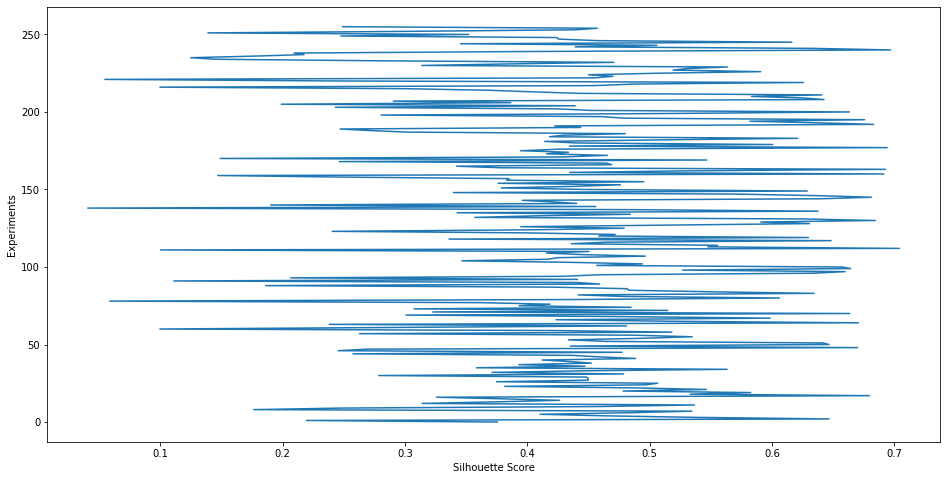

In [10]:
plt.figure(figsize=(16,8))
plt.plot(silhouette_scores,experiments)
plt.xlabel("Silhouette Score")
plt.ylabel("Experiments")
plt.show()

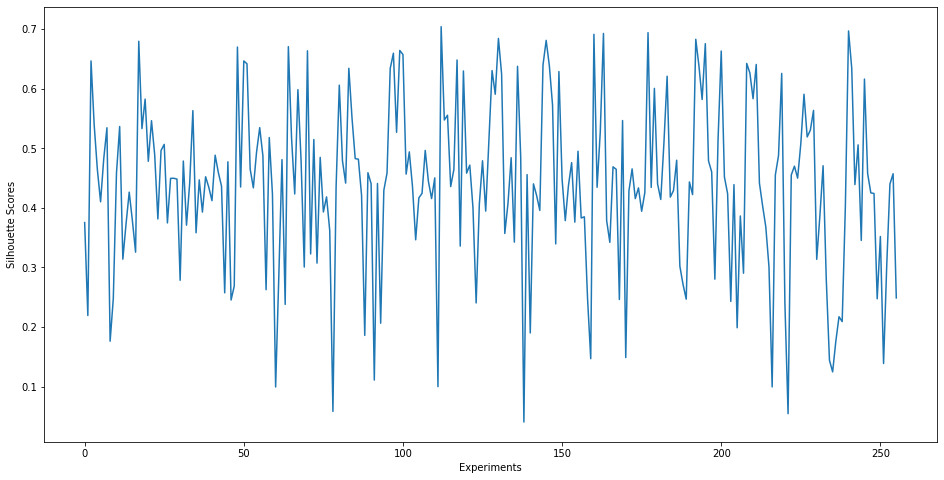

In [12]:
plt.figure(figsize=(16,8))
plt.plot(experiments,silhouette_scores)
plt.xlabel("Experiments")
plt.ylabel("Silhouette Scores")
plt.show()